In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [17]:
data = pd.read_csv('Mall_Customers.csv')

# 1. Check the data imported

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 2. Check the information of the data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset consists of 5 columns and 200 rows. Looking at **the dtype of columns**, there is **1 column** with *categorical value* (which is **"gender"**) and **other columns** have *continuous value*.

Since I only focus on **"Annual Income" and "Spending Score"**, I will drop irrelavant columns which are **"CustomerID", "Gender" and "Age"**.

In [21]:
data = data.iloc[:,[3,4]]

# 3. Check duplicated value

In [22]:
data.duplicated().sum()

4

There is **no duplicated data**. I do not have to drop any.

# 4. Check the overall statistics of the dataset 

In [23]:
data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


It is time to **scale the continuous value**. Based on the statistics of the two variables, both "Annual Income" and "Spending Score" have different ranges, with "Annual Income" ranging from 15 to 137, and "Spending Score" ranging from 1 to 99.

In this case, **normalization** is an appropriate scaling method as it scales the variables between 0 and 1, which helps in handling variables with different ranges.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

In [26]:
data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,0.373443,0.502041
std,0.215285,0.263505
min,0.000000,0.000000
25%,0.217213,0.344388
50%,0.381148,0.500000
75%,0.516393,0.734694
max,1.000000,1.000000


**Now the data is ready**

# 5. Kmeans clustering

In [27]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [28]:
from sklearn.cluster import KMeans

In [29]:
k_means = KMeans()
k_means.fit(data)
k_means.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 5, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 6, 1, 5, 1, 6, 1, 6, 1,
       5, 1, 6, 1, 6, 1, 6, 1, 6, 1, 5, 1, 6, 1, 5, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 5, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7])

The "KMeans" uses 8 clusters by default. I will implement **"elbow method"** to find the most appropriate number of clusters. 

# 6. Elbow method

In [30]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    wcss.append(k_means.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


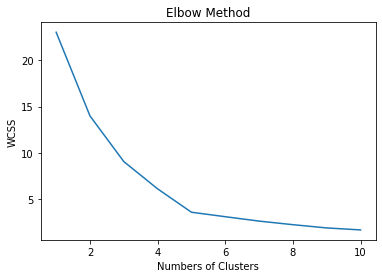

In [31]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

Now I know the optimal number for clusters is **5**. It is time for model training.

# 6. Model Training

In [34]:
X = data

In [35]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit_predict(X)

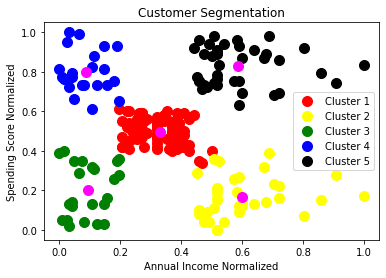

In [62]:
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,1], s=100,c='yellow', label='Cluster 2')
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,1], s=100,c='green', label='Cluster 3')
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,1], s=100,c='blue', label='Cluster 4')
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,1], s=100,c='black', label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s =100, c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income Normalized')
plt.ylabel('Spending Score Normalized')
plt.legend()

# 7. GUI

In [41]:
from tkinter import *

In [67]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    input_data = [[p1, p2]]
    input_data = np.array(input_data).reshape(1, -1)
    scaled_input_data = scaler.transform(input_data)
    
    result = k_means.predict(scaled_input_data)
    print('This customer belongs to cluster no: ', result[0])
    
    if result[0] == 0:
        Label(master, text = "Customers with medium annual income and medium spending score").grid(row=4)
    elif result[0] == 1:
        Label(master, text = "Customers with high annual income and low spending score").grid(row=4)
    elif result[0] == 2:
        Label(master, text = "Customers with low annual income and low spending score").grid(row=4)
    elif result[0] == 3:
        Label(master, text = "Customers with low annual income and high spending score").grid(row=4)
    elif result[0] == 4:
        Label(master, text = "Customers with high annual income and high spending score").grid(row=4)
        
master = Tk()
master.title('Customer Segmentation Using ML')

label = Label(master, text='Customer Segmentation Using ML', bg="black", fg='White').grid(row=0,columnspan = 2)
label = Label(master, text='Annual Income (k$)').grid(row=1)
label = Label(master, text='Spending Score(1-100)').grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict', command = show_entry_fields).grid()

master.mainloop()